<a href="https://colab.research.google.com/github/Junha9/AI/blob/master/Self_Learning_ML_DL/Chapter_08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import statements
import keras
import matplotlib.pyplot as plt

In [3]:
# load model
model = keras.models.load_model('./best-cnn-model.keras')

In [5]:
# check layers of loaded model
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [7]:
# check the frist convolution layers
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [10]:
# let's see as a numpy array
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01210549 0.2190617


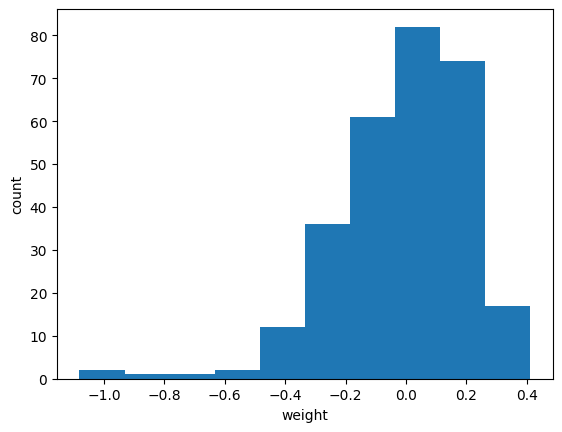

In [11]:
# Let's visually see it
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

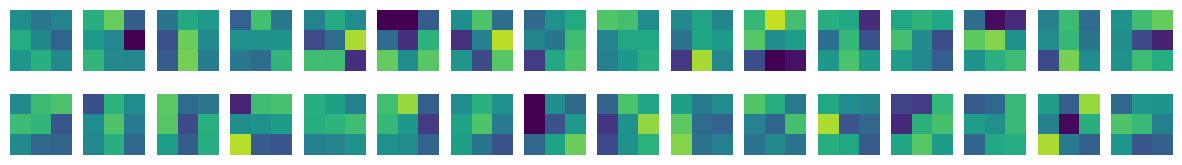

In [14]:
# Plot the weights of each kernel
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [16]:
# Let's compare the weights between untrained model
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [18]:
# Let's see the standard deviation and mean of weights
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0013275362 0.08227986


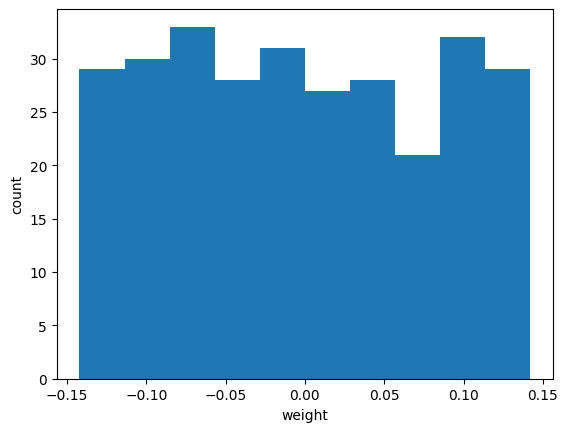

In [19]:
# Let's see the histogram and what's different
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

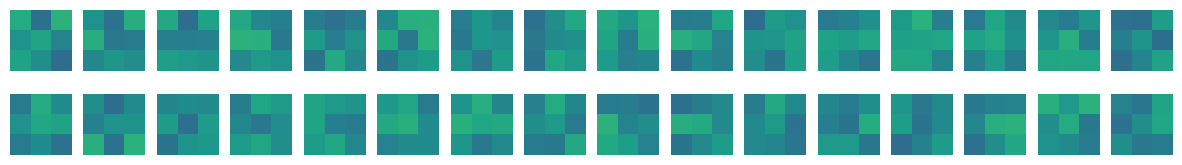

In [21]:
# Visualize the weights of kernels of untrained model We can see the weights are flattened.
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [23]:
# Let's check the diffrenet ways to build keras model. Let's prepare 3 layers first.
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [24]:
# Keras supports function like APIs to build a model
hidden = dense1(inputs)
outputs = dense2(hidden)
func_model = keras.Model(inputs, outputs)
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [26]:
# We can customize the model by customizing the inputs and outputs it will precit the first layer's output.
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


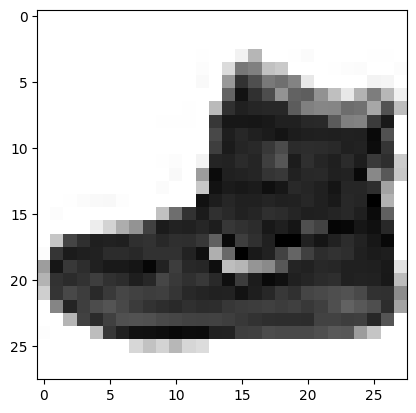

In [28]:
# Draw the first image of training set
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [29]:
# Let's check the first layer's output
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(1, 28, 28, 32)


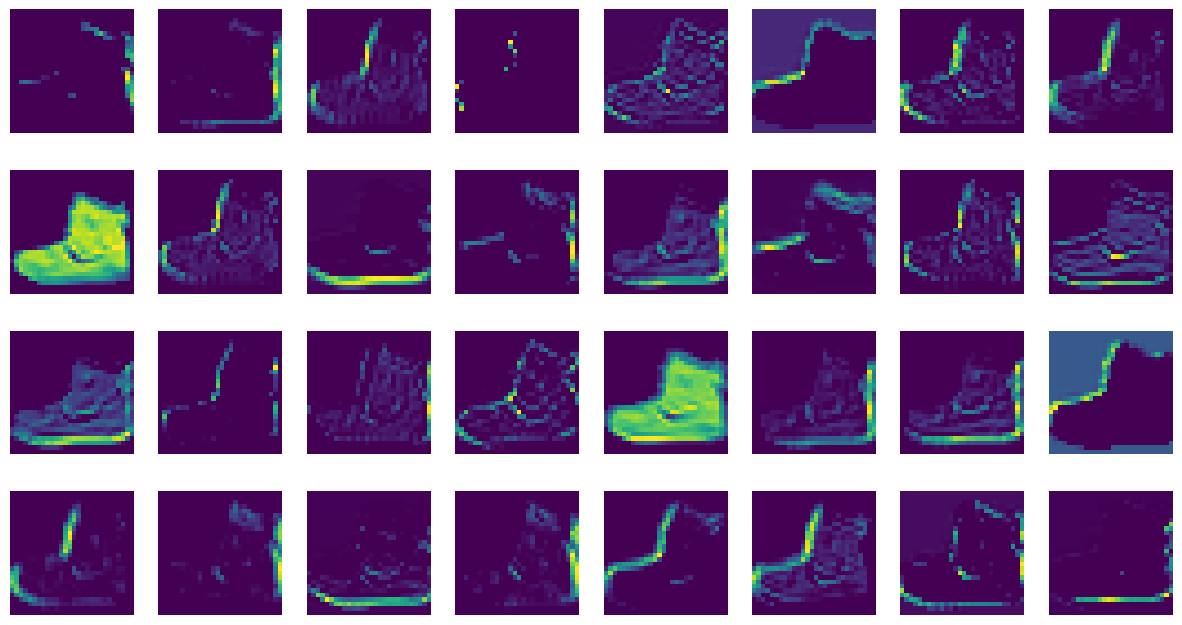

In [32]:
# Check the activated kernels.
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

In [33]:
# Let's check the feature maps for the second convlution layer.
conv2_acti = keras.Model(model.inputs[0], model.layers[2].output)
feature_maps = conv2_acti.predict(ankle_boot)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
(1, 14, 14, 64)


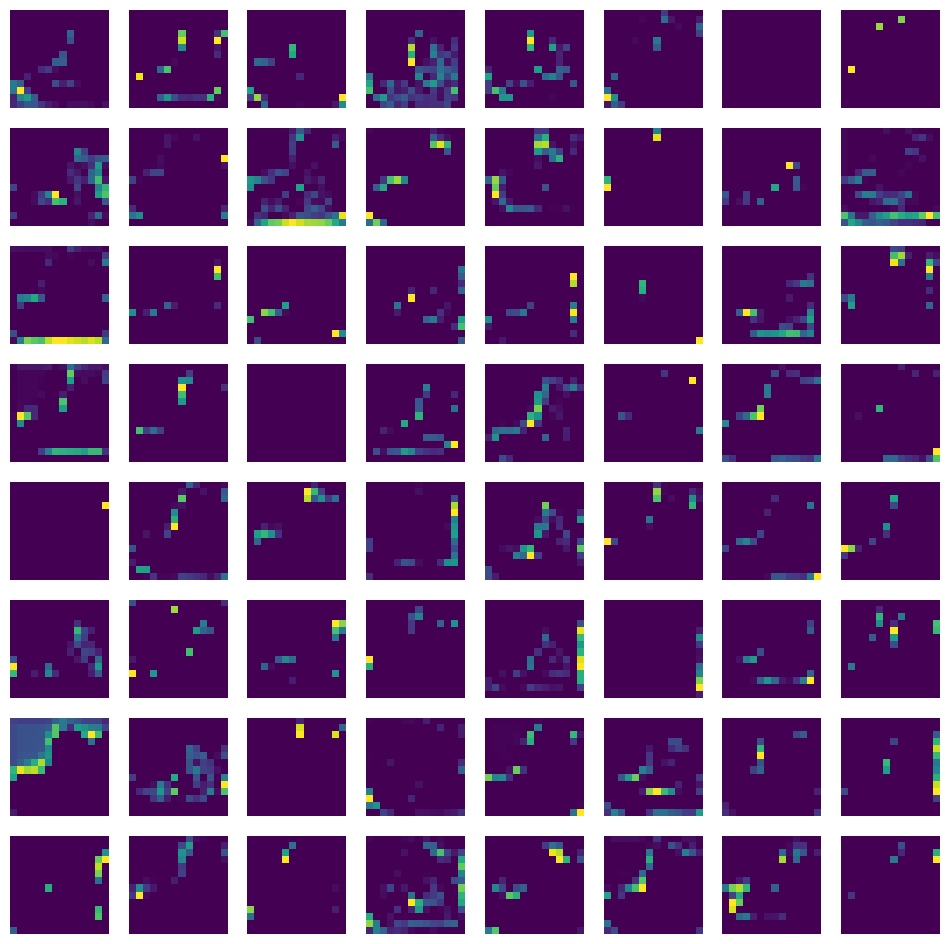

In [35]:
# plot the activated figure. second feature map is not intuitive as first layers since it specify the abstract information.
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()